In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("TRAIN.csv") 
print(df.head())
print(df.info())

   Sr. No.                                         Train Name Train Number  \
0        1          New Delhi - Varanasi Vande Bharat Express  22435/22436   
1        2  New Delhi - Shri Mata Vaishno Devi Katra Vande...  22439/22440   
2        3  Mumbai Central - Gandhinagar Capital Vande Bha...  20901/20902   
3        4       New Delhi - Amb Andaura Vande Bharat Express  22447/22448   
4        5  MGR Chennai Central - Mysuru Vande Bharat Express  20607/20608   

  Originating City Originating Station Terminal City  \
0            Delhi           New Delhi      Varanasi   
1            Delhi           New Delhi         Katra   
2           Mumbai      Mumbai Central   Gandhinagar   
3            Delhi           New Delhi       Andaura   
4          Chennai     Chennai Central        Mysuru   

               Terminal Station Operator  No. of Cars          Frequency  \
0             Varanasi Junction       NR           16   Except Thursdays   
1  Shri Mata Vaishno Devi Katra       NR  

In [3]:
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [4]:
df["Average occupancy"] = (
    df["Average occupancy"]
    .str.replace("%", "", regex=False)
    .astype(float)
)

In [7]:
total_trains = df.shape[0]
print("Total Trains:", total_trains)

Total Trains: 42


In [10]:
highest_occ = df.loc[df["Average occupancy"].idxmax()]
print(highest_occ[["Train Name", "Average occupancy"]])

Train Name           Kasaragod - Thiruvananthapuram Vande Bharat Ex...
Average occupancy                                                174.0
Name: 14, dtype: object


In [14]:
longest = df.loc[df["Distance"].idxmax()]
print(longest["Train Name"], longest["Distance"])

New Delhi - Varanasi Vande Bharat Express 759 km (472 mi)


In [13]:
df[df["Originating City"] == "Delhi"]

,Sr. No.,Train Name,Train Number,Originating City,Originating Station,Terminal City,Terminal Station,Operator,No. of Cars,Frequency,Distance,Travel Time,Speed,Average Speed,Inauguration,Average occupancy,Color
0,1,New Delhi - Varanasi Vande Bharat Express,22435/22436,Delhi,New Delhi,Varanasi,Varanasi Junction,NR,16,Except Thursdays,759 km (472 mi),08h 00m,130 km/h (81 mph),95 km/h (59 mph),2/15/2019,126.0,Blue & White
1,2,New Delhi - Shri Mata Vaishno Devi Katra Vande...,22439/22440,Delhi,New Delhi,Katra,Shri Mata Vaishno Devi Katra,NR,16,Except Tuesdays,655 km (407 mi),08h 00m,130 km/h (81 mph),82 km/h (51 mph),10/3/2019,114.0,Blue & White
3,4,New Delhi - Amb Andaura Vande Bharat Express,22447/22448,Delhi,New Delhi,Andaura,Amb Andaura,NR,16,Except Fridays,412 km (256 mi),05h 10m,130 km/h (81 mph),79 km/h (49 mph),10/13/2022,70.0,Blue & White
13,14,Delhi Cantonment - Ajmer Vande Bharat Express,20977/20978,Delhi,Delhi Cantonment,Ajmer,Ajmer Junction,NWR,16,Except Wednesdays,428 km (266 mi),05h 15m,110 km/h (68 mph),82 km/h (51 mph),4/12/2023,70.0,Blue & White
16,17,Anand Vihar Terminal - Dehradun Vande Bharat E...,22457/22458,Delhi,Anand Vihar Terminal,Dehradun,Dehradun Terminal,NR,8,Except Wednesdays,304 km (189 mi),04h 45m,130 km/h (81 mph),64 km/h (40 mph),5/25/2023,100.0,Blue & White
36,36,Anand Vihar – Ayodhya Dham Vande Bharat Express,22426/ 22425,Delhi,Delhi Anand Vihar,Ayodhya,Ayodhya Dham,NR,8,Except Wed,628 km (390 mi),08h 20m,130 km/h (81 mph),75 km/h (47 mph),30/12/23,NaN,Blue & White


In [15]:
df.groupby("Originating City").size()

Originating City
Ahmedabad        1
Amritsar         1
Bengaluru        2
Bhopal           2
Bilaspur         1
Chennai          4
Coimbatore       1
Delhi            6
Gorakhpur        1
Hyderabad        1
Indore           1
Jalna            1
Jodhpur          1
Kasaragod        2
Katra            1
Kolkata          4
Mangaluru        1
Mumbai           5
Patna            1
Rourkela         1
Siliguri         1
Udaipur          1
Varanasi         1
Visakhapatnam    1
dtype: int64

In [16]:
df.groupby("Originating City").size().loc[lambda x: x > 2]

Originating City
Chennai    4
Delhi      6
Kolkata    4
Mumbai     5
dtype: int64

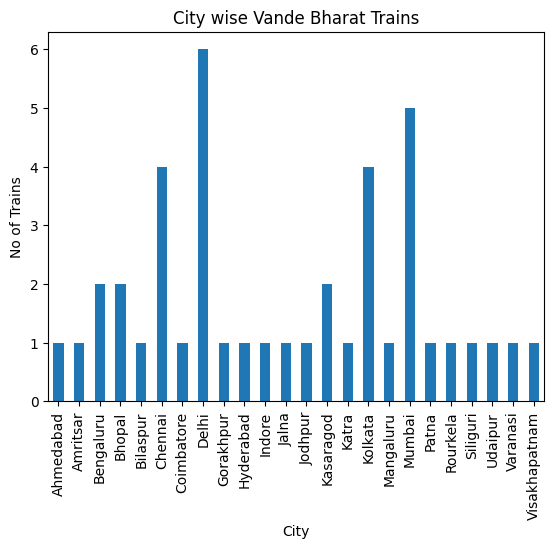

In [19]:
import matplotlib.pyplot as plt
df.groupby("Originating City").size().plot(kind="bar")
plt.title("City wise Vande Bharat Trains")
plt.xlabel("City")
plt.ylabel("No of Trains")
plt.show()

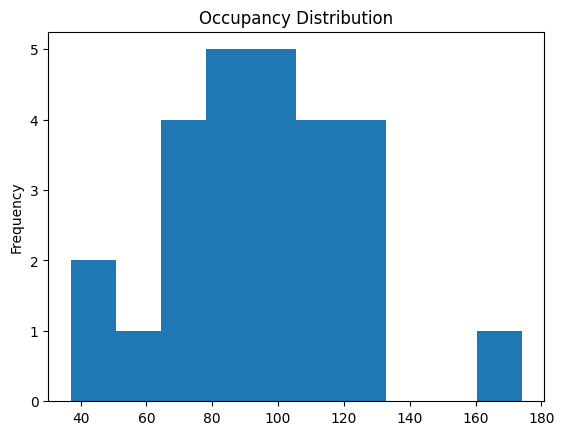

In [20]:
df["Average occupancy"].plot(kind="hist")
plt.title("Occupancy Distribution")
plt.show()